# Exercício 07 - Reinforcement Learning

## Q-Learning vs Sarsa - Ambiente não-determinístico

**Autores: Jorás e Renato**

Este projeto tem o objetivo de treinar modelos de reinforcement learning baseados nos algoritmos Q-Learning e Sarsa para o ambiente do Frozen Lake.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import src.frozen_lake as fl
from copy import deepcopy
from src.hyperparameters_data import Hyperparameters
from src.parameters_data import Parameters
from src.plotter import plot_learning_curve

Os conjuntos de hiperparâmetros que serão utilizados para treinamento e avaliação dos agentes estão definidos abaixo:

In [2]:
hyperparameters_1 = Hyperparameters(
    alpha=0.1,
    gamma=0.99,
    epsilon_start=1.0,
    epsilon_min=0.0,
    epsilon_dec=0.999,
)

hyperparameters_2 = Hyperparameters(
    alpha=0.1,
    gamma=0.99,
    epsilon_start=1.0,
    epsilon_min=0.1,
    epsilon_dec=0.999,
)

## Rotina de treinamento

Inicialmente, deve ser realizado o treinamento dos agentes. **Quatro** agentes diferentes serão treinados:

1. Algoritmo Q-Learning para o primeiro conjunto de hiperparâmetros;

1. Algoritmo Q-Learning para o segundo conjunto de hiperparâmetros;

1. Algoritmo Sarsa para o primeiro conjunto de hiperparâmetros;

1. Algoritmo Sarsa para o segundo conjunto de hiperparâmetros;

Algorithm: QLearning, Episode: 25000, Time: 14.82 seconds
Algorithm: QLearning, Episode: 25000, Time: 11.51 seconds
Algorithm: Sarsa, Episode: 25000, Time: 10.05 seconds
Algorithm: Sarsa, Episode: 25000, Time: 7.70 seconds


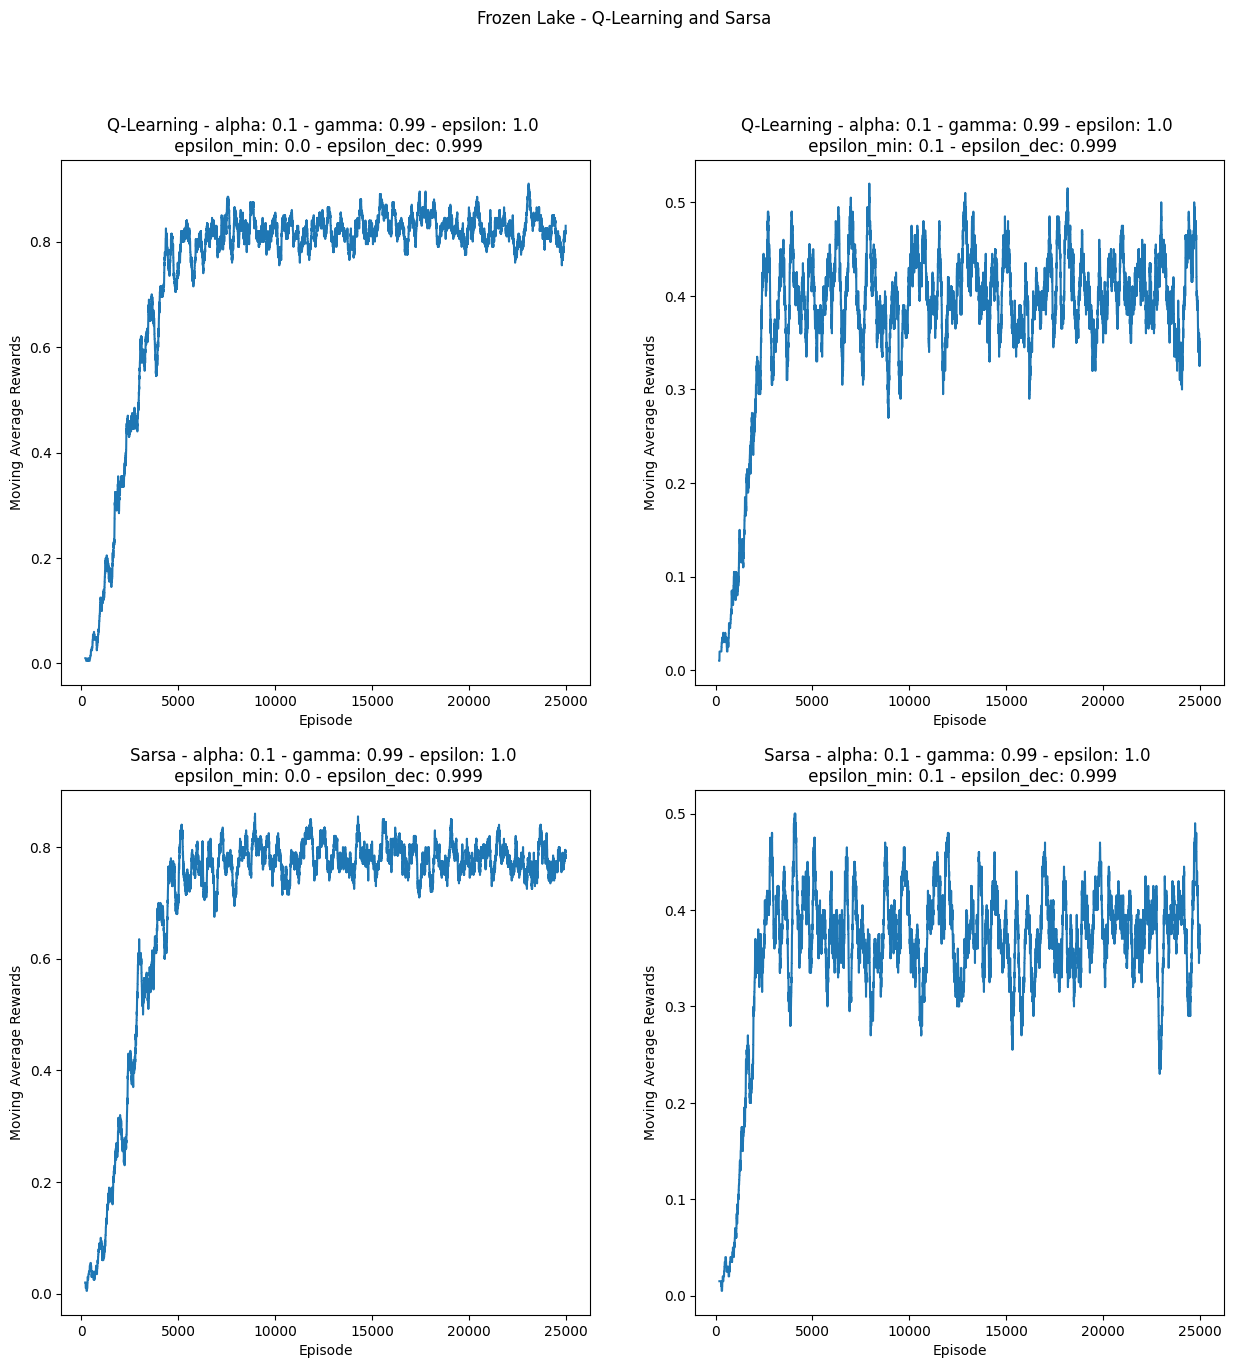

In [3]:
fig, axs = plt.subplots(2, 2, squeeze=False, figsize=(15, 15))
for i, algorithm in enumerate(["Q-Learning", "Sarsa"]):
    for j, hyperparameters in enumerate([hyperparameters_1, hyperparameters_2]):
        parameters = Parameters(
            base_filename=f"hyperparameters-{j+1}",
            episodes=25000,
            data_dir="data",
            results_dir="results"
        )
        fl.train(deepcopy(hyperparameters), parameters, algorithm)
        plot_learning_curve(hyperparameters, parameters, algorithm, axs[i, j])

fig.suptitle("Frozen Lake - Q-Learning and Sarsa")

if not os.path.isdir(parameters.results_dir):
    os.makedirs(parameters.results_dir)
fig.savefig(f"{parameters.results_dir}/frozen_lake.png")
plt.show()

## Rotina de avaliação dos agentes

Para avaliar cada um dos agentes, eles serão testados diversas vezes no ambiente, com o objetivo de se obter o desempenho dos mesmos, que será dado pela média da quantidade de vezes que o mesmo chegou até o destino final sem cair em um buraco.

In [4]:
performance_dict = {}
number_of_experiments = 100
for i, algorithm in enumerate(["Q-Learning", "Sarsa"]):
    for j, hyperparameters in enumerate([hyperparameters_1, hyperparameters_2]):
        parameters = Parameters(
            base_filename=f"hyperparameters-{j+1}",
            episodes=100000,
            data_dir="data",
            results_dir="results"
        )
        parameters.update_filename(algorithm.lower())
        performance_dict[parameters.filename] = 0
        for j in range(number_of_experiments):
            performance_dict[parameters.filename] += fl.test(parameters)
        performance_dict[parameters.filename] /= number_of_experiments

for agent, performance in performance_dict.items():
    print(f"Performance do agente {agent}: {performance}%")

Performance do agente q-learning-hyperparameters-1: 74.05%
Performance do agente q-learning-hyperparameters-2: 74.41%
Performance do agente sarsa-hyperparameters-1: 73.83%
Performance do agente sarsa-hyperparameters-2: 72.98%


## Conclusão

Considerando que se trata de um ambiente não determinístico, isto é, nem sempre o ambiente responde às ações do agente da mesma maneira, podemos analisar um comportamento interessante em relação à escolha de um hiperparâmetro epsilon ($\epsilon$) maior. Embora este parâmetro aumente a possibilidade de o agente escolher uma ação aleatoriamente, aumentando consecutivamente o não-determinismo de suas ações, esta escolha também mostrou uma tendência a aumentar a recompensa média à longo prazo, ao custo de uma curva de aprendizado mais lenta.

Por outro lado, quando o valor de epsilon é menor, o agente tende a realizar suas escolhas de forma mais consciente, buscando maximizar sempre o retorno, de acordo com a Q-Table. No entanto, esta preferência pelo exploit da Q-Table não se mostra tão recompensador, pois o próprio ambiente sabota estas decisões, exatamente por causa de seu comportamento não-determinístico.

De forma geral, o Q-Learning demonstrou uma performance ligeiramente superior ao Sarsa, possivelmente se dando por conta de suas características mais conservadoras na escolha da próxima ação.